In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
ds_salary = pd.read_csv("ds_salaries.csv")
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [86]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [87]:
# Shows the summary of the numerical attributes
ds_salary.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [88]:
# change the categorical data type to numerical data type
# replace "entry level" with 0, "mid level" with 1, and "senior level" with 2 and "executive level" with 3
ds_salary['experience_level'] = ds_salary['experience_level'].replace('EN', 0)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('MI', 1)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('SE', 2)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('EX', 3)

# replace "full time" with 0, "part time" with 1, "contract" with 2, and "internship" with 3
ds_salary['employment_type'] = ds_salary['employment_type'].replace('FT', 0)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('PT', 1)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('CT', 2)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('FL', 3)

# replace ratio 
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(0, 1)
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(50, 2)
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(100, 3)

# size
ds_salary['company_size'] = ds_salary['company_size'].replace('S', 1)
ds_salary['company_size'] = ds_salary['company_size'].replace('M', 2)
ds_salary['company_size'] = ds_salary['company_size'].replace('L', 3)


/var/folders/jv/fq8pvwqd681cg_hhk9wmj9000000gn/T/ipykernel_58288/1101773126.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_salary['experience_level'] = ds_salary['experience_level'].replace('EX', 3)
/var/folders/jv/fq8pvwqd681cg_hhk9wmj9000000gn/T/ipykernel_58288/1101773126.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_salary['employment_type'] = ds_salary['employment_type'].replace('FL', 3)
/var/folders/jv/fq8pvwqd681cg_hhk9wmj9000000gn/T/ipykernel_58288/1101773126.py:22: FutureWarning: Downcasting behavior in `

In [89]:
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,1,0,Data Scientist,70000,EUR,79833,DE,1,DE,3
1,1,2020,2,0,Machine Learning Scientist,260000,USD,260000,JP,1,JP,1
2,2,2020,2,0,Big Data Engineer,85000,GBP,109024,GB,2,GB,2
3,3,2020,1,0,Product Data Analyst,20000,USD,20000,HN,1,HN,1
4,4,2020,2,0,Machine Learning Engineer,150000,USD,150000,US,2,US,3


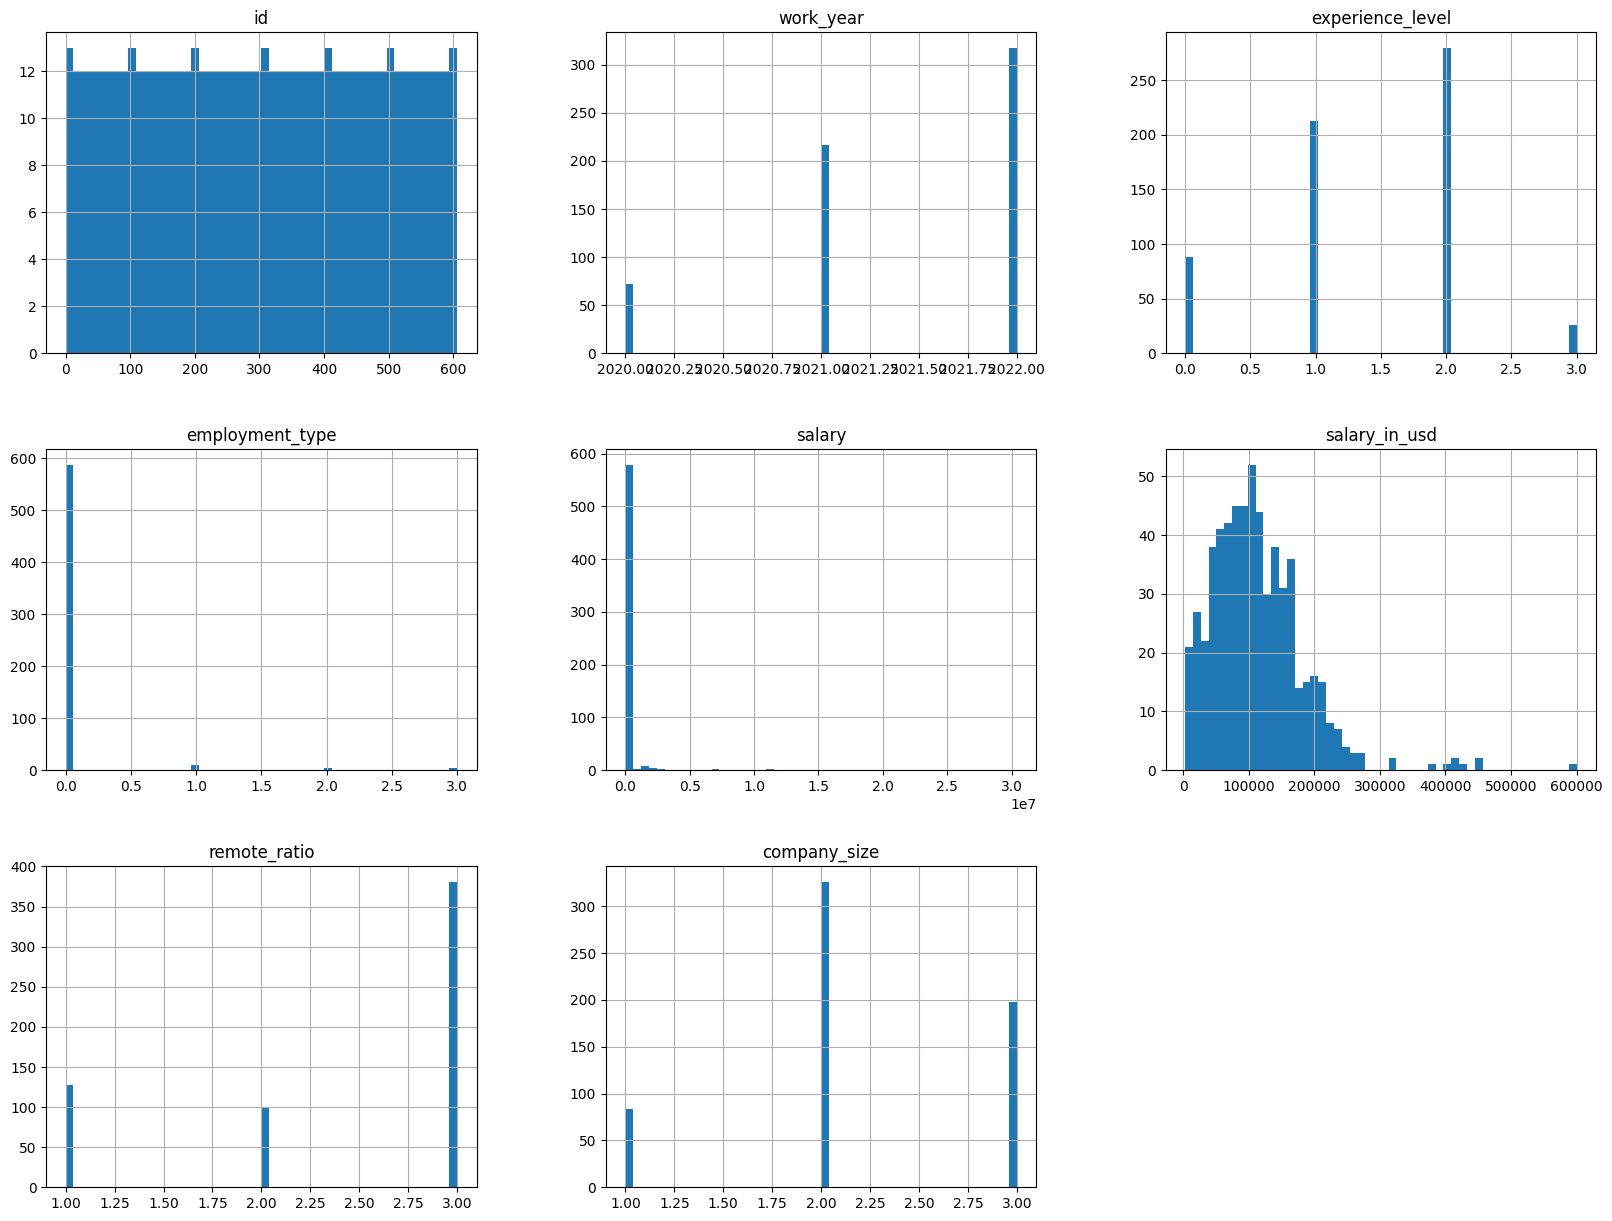

In [90]:
ds_salary.hist(bins=50,figsize=(20,15))
plt.show()

In [91]:
# add a new column to the dataset to indicate if the employee's residence is the same as the company's location
ds_salary['same_location'] = np.where(ds_salary['employee_residence'] == ds_salary['company_location'], 1, 0)


In [92]:
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,same_location
0,0,2020,1,0,Data Scientist,70000,EUR,79833,DE,1,DE,3,1
1,1,2020,2,0,Machine Learning Scientist,260000,USD,260000,JP,1,JP,1,1
2,2,2020,2,0,Big Data Engineer,85000,GBP,109024,GB,2,GB,2,1
3,3,2020,1,0,Product Data Analyst,20000,USD,20000,HN,1,HN,1,1
4,4,2020,2,0,Machine Learning Engineer,150000,USD,150000,US,2,US,3,1


In [93]:
# mean salary_in_usd
ds_salary["mean_salary_usd"] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'same_location'])["salary_in_usd"].transform('mean')
# min salary_in_usd
ds_salary["min_salary_usd"] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'same_location'])["salary_in_usd"].transform('min')
# max salary_in_usd
ds_salary["max_salary_usd"] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'same_location'])["salary_in_usd"].transform('max')

In [94]:
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,same_location,mean_salary_usd,min_salary_usd,max_salary_usd
0,0,2020,1,0,Data Scientist,70000,EUR,79833,DE,1,DE,3,1,78438.000000,40481,115000
1,1,2020,2,0,Machine Learning Scientist,260000,USD,260000,JP,1,JP,1,1,128249.333333,33511,260000
2,2,2020,2,0,Big Data Engineer,85000,GBP,109024,GB,2,GB,2,1,109024.000000,109024,109024
3,3,2020,1,0,Product Data Analyst,20000,USD,20000,HN,1,HN,1,1,20000.000000,20000,20000
4,4,2020,2,0,Machine Learning Engineer,150000,USD,150000,US,2,US,3,1,108750.750000,47899,150000


In [96]:
ds_salary = ds_salary.drop("id", axis=1)

In [97]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    int64  
 2   employment_type     607 non-null    int64  
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    int64  
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    int64  
 11  same_location       607 non-null    int64  
 12  mean_salary_usd     607 non-null    float64
 13  min_salary_usd      607 non-null    int64  
 14  max_salary_usd      607 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 71.3+ K

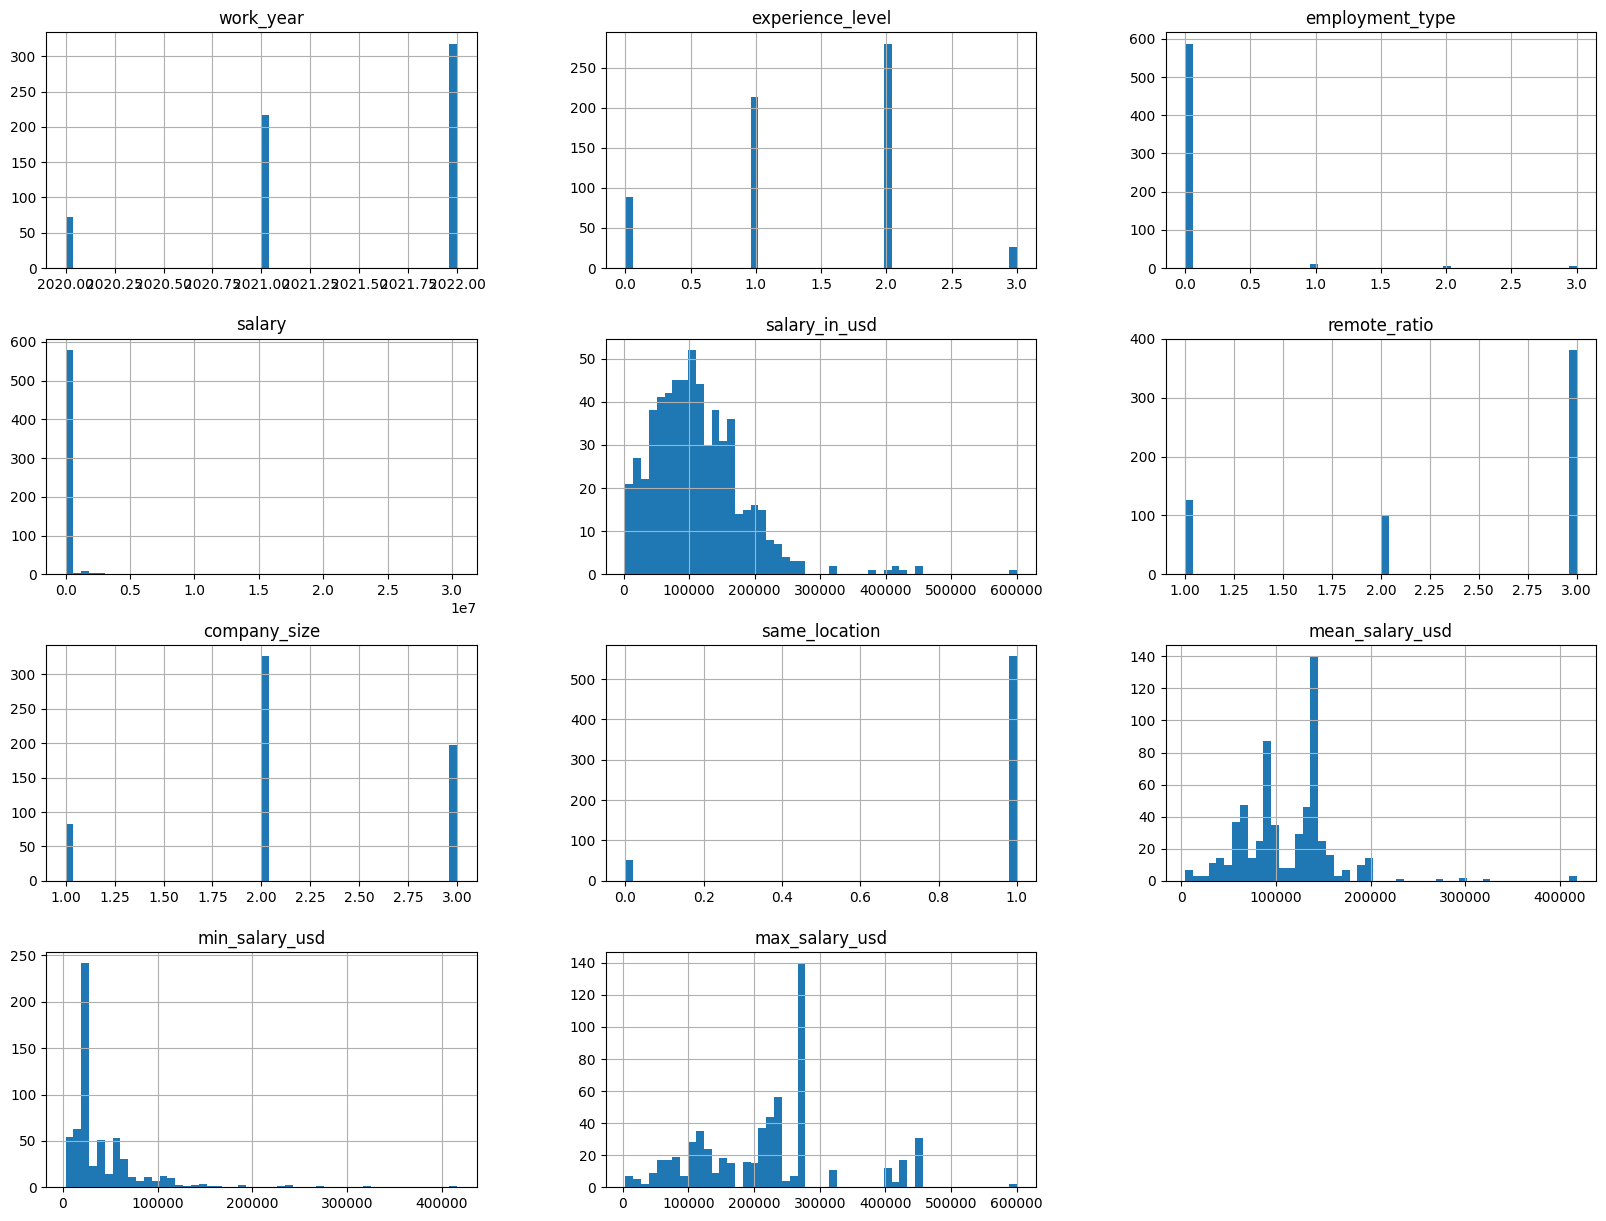

In [100]:
ds_salary.hist(bins=50,figsize=(20,15))
plt.show()